In [1]:
import os, sys 
#to be able to interact with Google Drive's operating system
from google.colab import drive 
#drive is a module that allows us use Python to interact with google drive
drive.mount('/content/drive') 
#mounting google drive allows us to work with its contents
nb_path = '/content/drive/MyDrive/CO543_Mini_Project/final codes'

#os.symlink('/content/drive/MyDrive', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)
#The last three lines are what changes the path of the file.

Mounted at /content/drive


In [2]:

!pip uninstall  --target=$nb_path opencv-python-headless==4.5.5.62
!pip install --target=$nb_path opencv-python-headless==4.1.2.30


Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: --target
     |████████████████████████████████| 21.8 MB 1.8 MB/s 
     |████████████████████████████████| 15.7 MB 36.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
! pip install easyocr

     |████████████████████████████████| 70.8 MB 13 kB/s 
     |████████████████████████████████| 47.6 MB 102 kB/s 


In [4]:
import easyocr
import imutils
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

(-0.5, 1020.5, 579.5, -0.5)

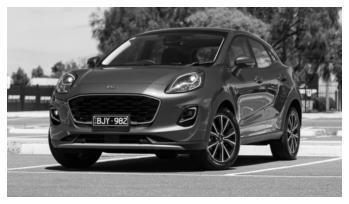

In [5]:
img = cv2.imread('/content/drive/MyDrive/CO543_Mini_Project/images/sample.jpg',0)
img = cv2.GaussianBlur(img,(3,3),10)
plt.imshow(img,cmap='gray')
plt.axis('off')

116.0


(-0.5, 1020.5, 579.5, -0.5)

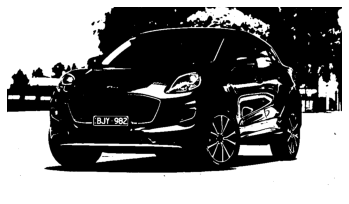

In [6]:
otsu_threshold, image_result = cv2.threshold(
    img, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU,
)
print(otsu_threshold)
plt.imshow(image_result, cmap='gray')
plt.axis('off')

(-0.5, 1020.5, 579.5, -0.5)

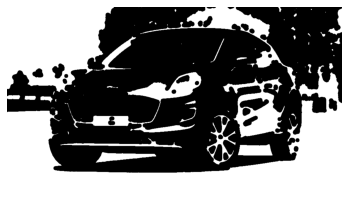

In [7]:
from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image  # noqa
from skimage.morphology import disk  # noqa

footprint = disk(6)
image = image_result.copy()
#phantom[10:30, 200:210] = 0
plt.imshow(image)
#closed = dilation(phantom, footprint)
#closed = black_tophat(phantom, footprint)
closed = closing(image, footprint)
plt.imshow(closed, cmap='gray')
plt.axis('off')

(-0.5, 1020.5, 579.5, -0.5)

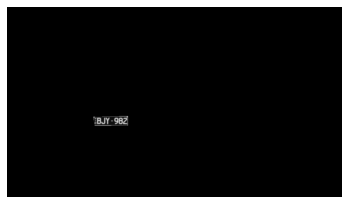

In [8]:
keypoints = cv2.findContours(image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

mask = np.zeros(img.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

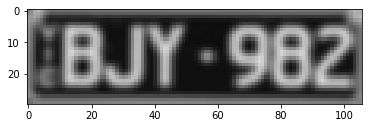

In [9]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = img[x1:x2+1, y1:y2+1]
cropped_image = cv2.GaussianBlur(cropped_image,(3,3),10)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteVehicle Number: BJY. 982


(-0.5, 105.5, 29.5, -0.5)

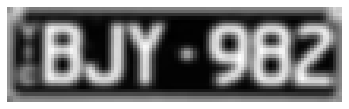

In [10]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print("Vehicle Number: "+ result[0][1])
plt.imshow(cropped_image,cmap='gray')
plt.axis('off')